In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sys
import os

In [2]:
abs_path = '/scratch/aew492/research-summer2020_output/'
mock_path = os.path.join(abs_path, 'gradient/1D/mock_data')

In [3]:
# mock parameters
rlz = 0
cat_tag = 'L750_n1e-4_z057_patchy_As2x'

## binned estimators

In [4]:
nbins = 22
nmocks = 100

xis = np.empty((3, nmocks, nbins))

for i in range(nmocks):
    # lognormal
    r_ln, xis[0, i] = np.load(os.path.join(abs_path, f'lognormal/xi/ls/{cat_tag}/xi_ls_3x_{cat_tag}_rlz{i}_lognormal.npy'), allow_pickle=True)
    # gradient
    r_m0, xis[1, i] = np.load(os.path.join(abs_path, f'gradient/1D/ls/{cat_tag}/xi_ls_3x_{cat_tag}_rlz{i}_m-0.000-L_b-0.500.npy'), allow_pickle=True)
    r_m1, xis[2, i] = np.load(os.path.join(abs_path, f'gradient/1D/ls/{cat_tag}/xi_ls_3x_{cat_tag}_rlz{i}_m-1.000-L_b-0.500.npy'), allow_pickle=True)

In [5]:
# averages
xis_avg = np.mean(xis, axis=1)

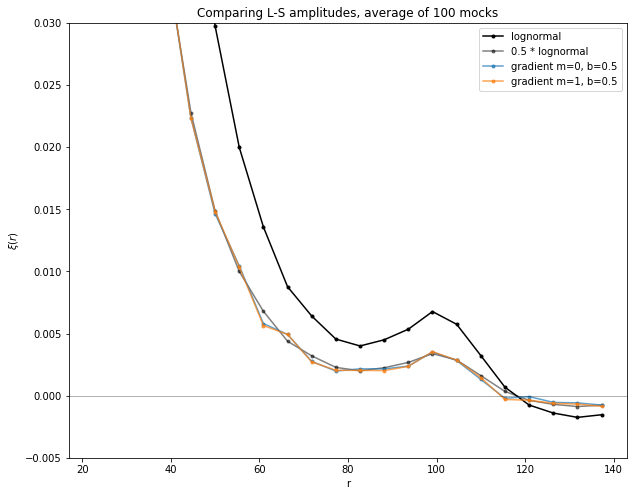

In [6]:
fig, ax = plt.subplots(figsize=(10,8))

alpha = 0.7

ax.plot(r_ln, xis_avg[0], 'k.-', label='lognormal')
ax.plot(r_ln, 0.5*xis_avg[0], 'k.-', alpha=0.5, label='0.5 * lognormal')
ax.plot(r_m0, xis_avg[1], 'C0.-', alpha=alpha, label='gradient m=0, b=0.5')
ax.plot(r_m1, xis_avg[2], 'C1.-', alpha=alpha, label='gradient m=1, b=0.5')

ax.axhline(0, lw=1, color='k', alpha=0.3)
ax.set_xlabel('r')
ax.set_ylabel(r'$\xi(r)$')
ax.set_ylim((-0.005, .03))
ax.set_title(f'Comparing L-S amplitudes, average of {nmocks} mocks')
plt.legend()

If $\xi_{\mathrm{grad}} = \overline{f}_c^2 \xi_{\mathrm{DD}}$ then we have $\overline{f}_c^2 = \frac{1}{2} \Rightarrow \overline{f}_c = \sqrt{\frac{1}{2}} = \sqrt{\eta_0}$, where $\eta_0 \equiv b$

### ratio of gradient to lognormal mock L-S amplitudes

#### L-S calculated using the same random catalog

In [7]:
ratio_m0 = xis_avg[1] / (0.5*xis_avg[0])
ratio_m1 = xis_avg[2] / (0.5*xis_avg[0])
ratio_m0, ratio_m1

(array([ 1.00408288,  0.99734255,  0.98729969,  1.00469305,  0.98181657,
         0.98420849,  1.04577487,  0.85463103,  1.12387001,  0.85937669,
         0.87124265,  1.07983221,  0.95807623,  0.88906563,  1.03957936,
         0.98549998,  0.81133456, -0.62417689,  0.19487273,  0.76916661,
         0.66587048,  0.9795462 ]),
 array([ 1.00271805,  0.99958243,  0.97947698,  1.00858724,  0.98155006,
         0.99582209,  1.03698527,  0.83114858,  1.1240685 ,  0.84890965,
         0.89762607,  1.01621235,  0.89726759,  0.88094024,  1.0474875 ,
         0.99529809,  0.89808967, -0.89973897,  0.97245862,  0.87552027,
         0.77737129,  1.11448869]))

In [8]:
rbin = 18
xis_avg[0, rbin], xis_avg[1, rbin], xis_avg[2, rbin]

(-0.0007537025714556968, -7.343803792709878e-05, -0.0003664722818065635)

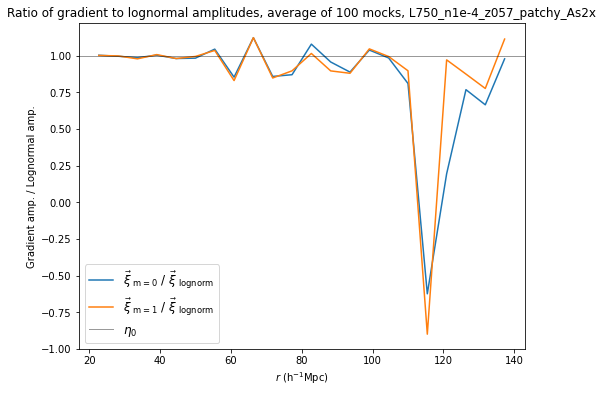

In [9]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(r_ln, ratio_m0, label=r'$\vec{\xi}_{\ \mathrm{m=0}} \ / \ \vec{\xi}_{\ \mathrm{lognorm}}$')
ax.plot(r_ln, ratio_m1, label=r'$\vec{\xi}_{\ \mathrm{m=1}} \ / \ \vec{\xi}_{\ \mathrm{lognorm}}$')
ax.axhline(1, lw=1, color='k', alpha=0.4, label='$\eta_0$')

ax.set_xlabel('$r$ (h$^{-1}$Mpc)')
ax.set_ylabel('Gradient amp. / Lognormal amp.')
ax.set_title(f'Ratio of gradient to lognormal amplitudes, average of {nmocks} mocks, {cat_tag}')

ax.legend(prop={'size': 12})

#### L-S calculated using unique random catalog

In [10]:
nbins = 22
nmocks = 100

xis_ur = np.empty((3, nmocks, nbins))

for i in range(nmocks):
    # lognormal
    r_ln, xis_ur[0, i] = np.load(os.path.join(abs_path, f'lognormal/xi/ls/{cat_tag}/xi_ls_3x_{cat_tag}_rlz{i}_lognormal.npy'), allow_pickle=True)
    # gradient
    r_m0, xis_ur[1, i] = np.load(os.path.join(abs_path, f'gradient/1D/ls/{cat_tag}/unique_rands/xi_ls_3x_{cat_tag}_rlz{i}_m-0.000-L_b-0.500.npy'), allow_pickle=True)
    r_m1, xis_ur[2, i] = np.load(os.path.join(abs_path, f'gradient/1D/ls/{cat_tag}/unique_rands/xi_ls_3x_{cat_tag}_rlz{i}_m-1.000-L_b-0.500.npy'), allow_pickle=True)

In [11]:
# averages
xis_ur_avg = np.mean(xis_ur, axis=1)

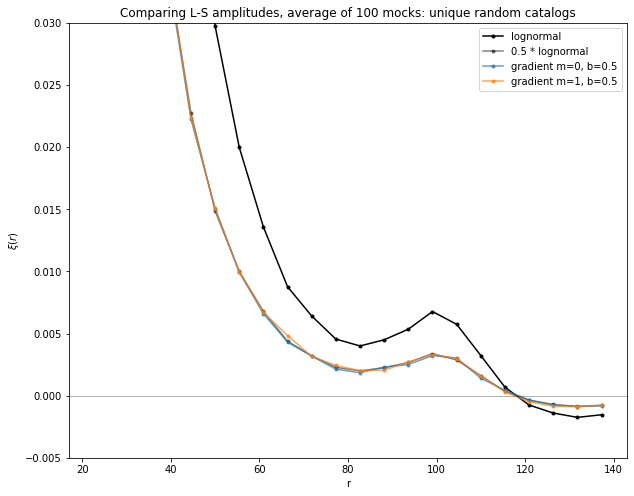

In [12]:
fig, ax = plt.subplots(figsize=(10,8))

alpha = 0.7

ax.plot(r_ln, xis_ur_avg[0], 'k.-', label='lognormal')
ax.plot(r_ln, 0.5*xis_ur_avg[0], 'k.-', alpha=0.5, label='0.5 * lognormal')
ax.plot(r_m0, xis_ur_avg[1], 'C0.-', alpha=alpha, label='gradient m=0, b=0.5')
ax.plot(r_m1, xis_ur_avg[2], 'C1.-', alpha=alpha, label='gradient m=1, b=0.5')

ax.axhline(0, lw=1, color='k', alpha=0.3)
ax.set_xlabel('r')
ax.set_ylabel(r'$\xi(r)$')
ax.set_ylim((-0.005, .03))
ax.set_title(f'Comparing L-S amplitudes, average of {nmocks} mocks: unique random catalogs')
plt.legend()

In [13]:
ratio_ur_m0 = xis_ur_avg[1] / (0.5*xis_ur_avg[0])
ratio_ur_m1 = xis_ur_avg[2] / (0.5*xis_ur_avg[0])

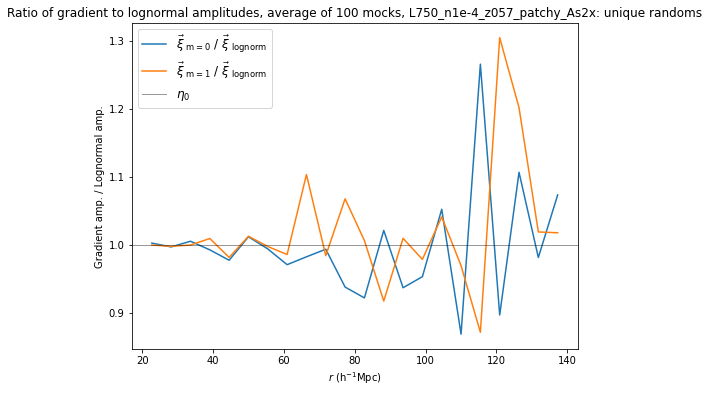

In [14]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(r_ln, ratio_ur_m0, label=r'$\vec{\xi}_{\ \mathrm{m=0}} \ / \ \vec{\xi}_{\ \mathrm{lognorm}}$')
ax.plot(r_ln, ratio_ur_m1, label=r'$\vec{\xi}_{\ \mathrm{m=1}} \ / \ \vec{\xi}_{\ \mathrm{lognorm}}$')
ax.axhline(1, lw=1, color='k', alpha=0.4, label='$\eta_0$')

ax.set_xlabel('$r$ (h$^{-1}$Mpc)')
ax.set_ylabel('Gradient amp. / Lognormal amp.')
ax.set_title(f'Ratio of gradient to lognormal amplitudes, average of {nmocks} mocks, {cat_tag}: unique randoms')

ax.legend(prop={'size': 12})

### ratio of amplitudes for 1 mock

In [15]:
rlz = 1

In [16]:
xis[:,rlz,:].shape

(3, 22)

In [17]:
xi_ln, xi_m0, xi_m1 = xis[:,rlz,:]

In [18]:
ratio_emp_m0 = xi_m0 / (0.5*xi_ln)
ratio_emp_m1 = xi_m1 / (0.5*xi_ln)

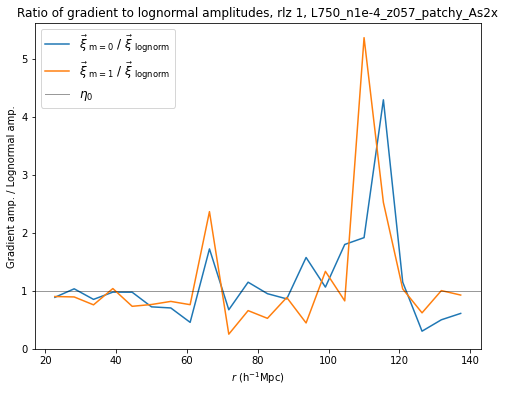

In [19]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(r_ln, ratio_emp_m0, label=r'$\vec{\xi}_{\ \mathrm{m=0}} \ / \ \vec{\xi}_{\ \mathrm{lognorm}}$')
ax.plot(r_ln, ratio_emp_m1, label=r'$\vec{\xi}_{\ \mathrm{m=1}} \ / \ \vec{\xi}_{\ \mathrm{lognorm}}$')
ax.axhline(1, lw=1, color='k', alpha=0.4, label='$\eta_0$')

ax.set_xlabel('$r$ (h$^{-1}$Mpc)')
ax.set_ylabel('Gradient amp. / Lognormal amp.')
ax.set_title(f'Ratio of gradient to lognormal amplitudes, rlz {rlz}, {cat_tag}')

ax.legend(prop={'size': 12})

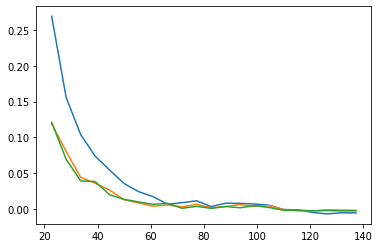

In [20]:
plt.plot(r_ln, xi_ln)
plt.plot(r_ln, xi_m0)
plt.plot(r_ln, xi_m1)

Similarity of the spikes suggests that they result from the initial lognormal mock as opposed to gradient injection.

## threshold visualisation

$ \tau(\mathbf{x})=\sqrt{\mathbf{\omega}\cdot\mathbf{x}+\eta_0} $

$ \tau(x) = \sqrt{mx+\eta_0} $ in one dimension

In [ ]:
L = 750
x = np.linspace(-L/2, L/2, 100)
def tau(x, m, b=0.5):
    tau = np.sqrt(m*x + b)
    return tau

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, tau(x,1/L))
ax.plot(x, tau(x,0))

for xval in [0, -L/2, L/2]:
    ax.axvline(xval, color='k', alpha=0.3, lw=1)
for yval in [0,1]:
    ax.axhline(yval, color='k', alpha=0.3, lw=1)
ax.set_xlabel(r'$x$ ( $h^{-1}$Mpc)')
ax.set_ylabel(r'$\tau(x)$')
ax.set_title(r'Threshold $\tau(\mathbf{x})=\sqrt{\mathbf{\omega}\cdot\mathbf{x}+\eta_0}$, $\mathbf{\omega}=[1.0, 0, 0]$')

empirically, we are finding that the fraction of clustered points in the gradient catalog matches the average value of the threshold across the box!

In [ ]:
ms = [0, 1]
b = 0.5
rlz = 0

In [ ]:
mock_dicts = [np.load(os.path.join(mock_path, f'{cat_tag}/{cat_tag}_rlz{rlz}_m-{m:.3f}-L_b-{b:.3f}.npy'), allow_pickle=True).item() for m in ms]

N_C_m0, N_C_m1 = [len(info['clust_set']) for info in mock_dicts]
N_grad_m0, N_grad_m1 = [len(info['grad_set']) for info in mock_dicts]
N_ln_m0, N_ln_m1 = [info['N'] for info in mock_dicts]

Expectation with $m=0$ is that $f_c = \sqrt{\eta_0} \Rightarrow \frac{1}{\sqrt{2}}$ when $\eta_0 = 1/2$

In [ ]:
N_C_m0 / N_grad_m0

Expectation with $m=1$ is that $f_c = \frac{2}{3}$ when $\eta_0 = 1/2$

In [ ]:
N_C_m1 / N_grad_m1